<a href="https://colab.research.google.com/github/mobambas/Fine-Grained-Artwork-Classifier/blob/main/Artwork_Forgery_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Finetuning to Develop a Parameter-Efficient Neural Network Model for Forgery Detection in Artworks

**Author:** [Shriyansh Singh](https://github.com/mobambas), Neev Ashish Dattani

**Date created:** 10/06/2024

**Last modified:** 12/06/2024

**Description:** This project aims to accurately determine the authenticity of famous art paintings around the globe by using machine learning. In today's world, the exponentially accelerated expansion of computational notions and their endless potential, alongside which an increasing number of unexplored machine learning applications are unravelled, we have identified this problem statement as relevant and challenging. Currently, the detection of forgery or replicas in museums is done by examining the painting in fine-detail by an expert curator. Ongoing research on automated art-piece identification is limited. Through machine learning, we aim to identify if two paintings are painted by the same person, and thus verify their genuineness. We believe that our proposed solution for detecting forgery in art paintings holds interesting applications for curators, art historians, connoisseurs and art lovers alike. Through our project, not only can forgery be detected, but also the subtle similarities and variations between different artists be found out, through the characteristics and style of their paintings identified via machine learning.

# EXPLORATORY DATA ANALYSIS (EDA) TASK | WEEK 1

**STEP 1)** Plotting the class distribution for the chosen dataset(s), and comparing the distributions if necessary.

**STEP 2)** Studying different categories and plotting sample images of some categories.

**STEP 3)** Qualitative and quantitative analysis to visualise the differentiability between categories through parametetric fine-grained image analysis.

First, we need to download the WikiArt dataset (since the dataset is in the croissant format, it is available to download in the Hugging Face model hub). If you don't have the datasets library installed, install it using the following command in your terminal.

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 610.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting unins

Then download the dataset as follows:

In [ ]:
from datasets import load_dataset

wiki_art = load_dataset("huggan/wikiart", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

Now let's create a PyTorch DataLoader to iterate over the dataset:

In [ ]:
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch

# Load the WikiArt dataset
wiki_art = load_dataset("huggan/wikiart", split="train")

# Define a custom dataset class for our WikiArt data
class WikiArtDataset(Dataset):
    def __init__(self, wiki_art, transform=None):
        self.wiki_art = wiki_art
        self.transform = transform

    def __len__(self):
        return len(self.wiki_art)

    def __getitem__(self, idx):
        sample = self.wiki_art[idx]
        image = sample['image']
        style = sample['style']  # Assuming 'tyle' is a column in the dataset

        if self.transform:
            image = self.transform(image)

        return {
            'image': image,
            'style': torch.tensor(style)  # Return 'tyle' as a tensor
        }

# Define a data transform for our images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a dataset instance and data loader
dataset = WikiArtDataset(wiki_art, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

In [ ]:
batch_idx = 0
for batch in data_loader:
    images, styles = batch['image'], batch['style']
    print(f"Batch {batch_idx}:")
    print("Images:")
    print(f"Min: {images.min()}, Max: {images.max()}, Mean: {images.mean()}, Std: {images.std()}")
    print("Styles:")
    print(f"Unique values: {torch.unique(styles)}")
    batch_idx += 1
    if batch_idx >= 5:  # stop after 5 batches
        break

Batch 0:
Images:
Min: -2.1007792949676514, Max: 2.640000104904175, Mean: 0.08149459958076477, Std: 1.0750253200531006
Styles:
Unique values: tensor([ 3,  4,  5,  8, 11, 12, 13, 15, 17, 20, 21, 23, 24, 26])
Batch 1:
Images:
Min: -2.1007792949676514, Max: 2.6225709915161133, Mean: 0.10171143710613251, Std: 1.107088327407837
Styles:
Unique values: tensor([ 3,  4,  5,  9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 26])
Batch 2:
Images:
Min: -2.1179039478302, Max: 2.640000104904175, Mean: -0.07824299484491348, Std: 1.1131800413131714
Styles:
Unique values: tensor([ 3,  4,  5,  7, 10, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25])
Batch 3:
Images:
Min: -2.1179039478302, Max: 2.640000104904175, Mean: 0.04663136228919029, Std: 1.1545779705047607
Styles:
Unique values: tensor([ 0,  3,  4,  5,  9, 11, 12, 14, 20, 21, 22, 23, 24, 26])
Batch 4:
Images:
Min: -2.1179039478302, Max: 2.640000104904175, Mean: 0.12161830812692642, Std: 1.1706902980804443
Styles:
Unique values: tensor([ 0,  3,  4,  5,  8,  9,

However, additionally, in order for us to finally begin plotting the class-distributions, we must store the dataset in a PandasDataFrame:

In [ ]:
import pandas as pd

# Convert the DataLoader to a Pandas DataFrame
def data_loader_to_data_frame(data_loader):
    all_data = []
    for batch in data_loader:
        images, styles, genres, artists = batch
        for image, style, genre, artist in zip(images, styles, genres, artists):
            data = {
                'image': image,
                'style': style,
                'genre': genre,
                'artist': artist
            }
            all_data.append(data)

    df = pd.DataFrame(all_data)
    return df

wiki_art_df = data_loader_to_data_frame(data_loader)

ValueError: not enough values to unpack (expected 4, got 2)

This bears several advantages, such as:

*1. Efficient Data Loading:* PyTorch's DataLoader is designed to handle large datasets and provides efficient data loading, batching, and shuffling. This can be particularly useful if your dataset is large and doesn't fit in memory.

*2. Flexibility:* By using a DataLoader, you can easily switch between different datasets, batch sizes, and sampling strategies without modifying the rest of your code.

*3. Parallelization:* PyTorch's DataLoader can take advantage of multiple CPU cores to load data in parallel, which can significantly speed up data loading.

**STEP 1)**

Plotting the class distributions:

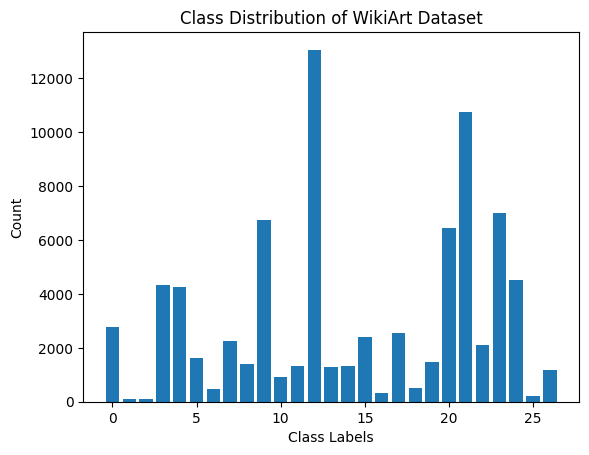

In [ ]:
import matplotlib.pyplot as plt

# Load the WikiArt dataset
wiki_art = load_dataset("huggan/wikiart", split="train")

# Plot the class distribution
class_labels = wiki_art['style']
class_counts = class_labels.value_counts()
plt.plot(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution of WikiArt Dataset')
plt.show()

**STEP 2)**

Studying different categories and plotting sample images as such:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

# Assuming wiki_art is a list of dictionaries
wiki_art_df = pd.DataFrame(wiki_art)

# Define a function to plot sample images
def plot_sample_images(category):
    category_images = wiki_art_df[wiki_art_df['style'] == category]
    sample_images = category_images.sample(min(5, len(category_images)))
    fig, axs = plt.subplots(1, len(sample_images), figsize=(15, 5))
    for i, row in enumerate(sample_images.itertuples()):
        img_path = row.image_path  # Assuming image path is stored in 'image_path' column
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
        axs[i].imshow(img)
        axs[i].set_title(category)
        axs[i].axis('off')
    plt.show()

# Plot sample images for each category
categories = wiki_art_df['style'].unique()
for category in categories:
    plot_sample_images(category)

KeyboardInterrupt: 

**STEP 3)** In order for us to be able to qualitatively and quantitatively understand the differentiability between different categories in the WikiArt dataset, we can undertake three different forms of analysis:

Firstly, we can use OpenCV to extract *color histograms* from each image, and also conduct a texture and shape analysis:

In [ ]:
import cv2
import numpy as np

# Define functions to extract features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, None).flatten()
    return hist

def extract_texture_features(img):
    glcm = greycomatrix(img, [5], [0], symmetric=True, normed=True)
    contrast = greycoprops(glcm, prop='contrast')
    homogeneity = greycoprops(glcm, prop='homogeneity')
    energy = greycoprops(glcm, prop='energy')
    correlation = greycoprops(glcm, prop='correlation')
    return [contrast, homogeneity, energy, correlation]

def extract_shape_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_areas = [cv2.contourArea(c) for c in contours]
    return contour_areas

# Define a function to process a category
def process_category(category):
    category_indices = [i for i, x in enumerate(wiki_art['style']) if x == category]
    batch_indices = [category_indices[i:i + batch_size] for i in range(0, len(category_indices), batch_size)]

    color_histograms = []
    texture_features = []
    shape_features = []

    for batch in batch_indices:
        batch_images = [wiki_art['image'][i] for i in batch]
        batch_color_histograms = [extract_color_histogram(img) for img in batch_images]
        batch_texture_features = [extract_texture_features(img) for img in batch_images]
        batch_shape_features = [extract_shape_features(img) for img in batch_images]

        color_histograms.extend(batch_color_histograms)
        texture_features.extend(batch_texture_features)
        shape_features.extend(batch_shape_features)

    return color_histograms, texture_features, shape_features

# Process each category
categories = list(set(wiki_art['style']))

color_histograms = {}
texture_features = {}
shape_features = {}

for category in categories:
    color_histograms[category], texture_features[category], shape_features[category] = process_category(category)

KeyboardInterrupt: 

This sub-step involves extracting the artworks' features from each image in the WikiArt dataset and visualizing them using histograms and pi-charts.

Visualising the features:

In [ ]:
import matplotlib.pyplot as plt

# Visualize the color histograms
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 20))

for i, category in enumerate(categories):
    axs[i].hist(color_histograms[category], bins=50, alpha=0.5, label=category)
    axs[i].set_title(category)
    axs[i].set_xlabel("Color Histogram")
    axs[i].set_ylabel("Frequency")

plt.show()

# Visualize the texture features
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 20))

for i, category in enumerate(categories):
    axs[i].scatter([f[0] for f in texture_features[category]], [f[1] for f in texture_features[category]])
    axs[i].set_title(category)
    axs[i].set_xlabel("Contrast")
    axs[i].set_ylabel("Homogeneity")

plt.show()

# Visualize the shape features
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 20))

for i, category in enumerate(categories):
    axs[i].hist([f for f in shape_features[category]], bins=50, alpha=0.5, label=category)
    axs[i].set_title(category)
    axs[i].set_xlabel("Contour Area")
    axs[i].set_ylabel("Frequency")

plt.show()